<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

1. [Imports](#Imports)
1. [Homoskedastic illustrations](#Homoskedastic-illustrations)
1. [Heteroskedastic illustrations](#Heteroskedastic-illustrations)
    1. [CQR](#CQR)
    1. [From no coverage to conditional coverage](#From-no-coverage-to-conditional-coverage)
    1. [Comparing conformity scores functions](#Comparing-conformity-scores-functions)
1. [Quantile regression illustrations](#Quantile-regression-illustrations)
1. [Motivating illustrations](#Motivating-illustrations)

# Imports

In [1]:
import random
import numpy as np
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import pandas as pd 
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset,inset_axes

size=19
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': 'Times',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': size,
    'axes.labelsize':size,
    'axes.titlesize':size,
    'figure.titlesize':size,
    'xtick.labelsize':size,
    'ytick.labelsize':size,
    'legend.fontsize':size,
})

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
colors_blindness = sns.color_palette("colorblind")
colors_blindness

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
color_train = colors_blindness[1]
color_cal = colors_blindness[9]
color_test = colors_blindness[4] 

In [4]:
s = 11
random.seed(s)
np.random.seed(s)
n = 300
X = np.random.uniform(low=0,high=5,size=n)
eps = np.random.normal(size=n)
alpha=0.1

In [5]:
Y_add = np.cos(X)+eps
Y_mul = (1-np.cos(X))*eps

In [6]:
idx = np.random.permutation(n)
n_half = int(np.floor(n/3))
idx_train, idx_cal, idx_test = idx[:n_half], idx[n_half:2*n_half], idx[2*n_half:]

# Homoskedastic illustrations

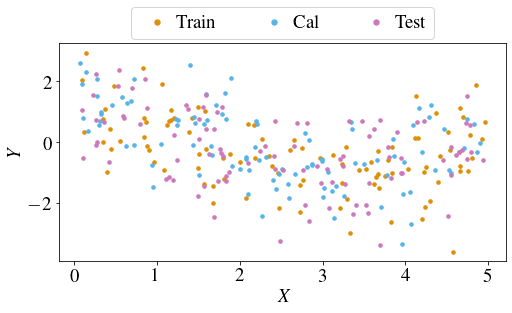

In [7]:
Y_add = np.cos(X)+eps
plt.figure(figsize=(8,4))
plt.scatter(X[idx_train],Y_add[idx_train],marker='.',color=color_train, s=50,label="Train")
plt.scatter(X[idx_cal],Y_add[idx_cal],marker='.',color=color_cal, s=50,label="Cal")
plt.scatter(X[idx_test],Y_add[idx_test],marker='.',color=color_test, s=50,label="Test")
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.ylim(min(Y_add)-0.3,max(Y_add)+0.3)
plt.legend(loc=(0.16, 1.02), ncols=3, handletextpad=0, markerscale=1.5)
#plt.savefig('all_homo.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [8]:
Y = Y_add
X_f = np.cos(X)

reg = LinearRegression()
reg.fit(X_f[idx_train].reshape(-1, 1), Y[idx_train])
y_pred_cal = reg.predict(X_f[idx_cal].reshape(-1, 1))
y_pred_train = reg.predict(X_f[idx_train].reshape(-1, 1))
res_cal = Y[idx_cal]-y_pred_cal
y_pred_test = reg.predict(X_f[idx_test].reshape(-1, 1))

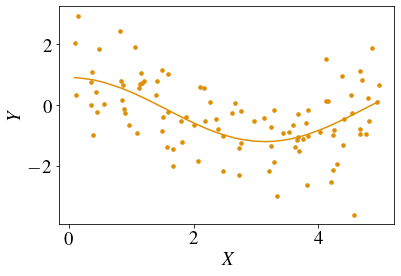

In [9]:
plt.scatter(X[idx_train],Y[idx_train],marker='.',color=color_train, s=50)
plt.plot(X[idx_train][np.argsort(X[idx_train])],y_pred_train[np.argsort(X[idx_train])],color=color_train)
plt.ylim(min(Y_add)-0.3,max(Y_add)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('train_homo.pdf', bbox_inches='tight',dpi=300)
plt.show()

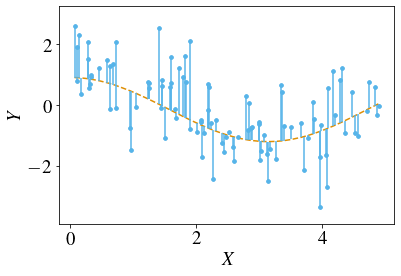

In [10]:
plt.scatter(X[idx_cal],Y[idx_cal],marker='.',color=color_cal, s=50)
plt.plot(X[idx_cal][np.argsort(X[idx_cal])],y_pred_cal[np.argsort(X[idx_cal])],'--',color=color_train)
plt.vlines(X[idx_cal],Y[idx_cal],y_pred_cal,color=color_cal)
plt.scatter(X[idx_cal],Y[idx_cal],marker='.',color=color_cal,zorder=2)
plt.ylim(min(Y_add)-0.3,max(Y_add)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('cal_homo.pdf', bbox_inches='tight',dpi=300)
plt.show()

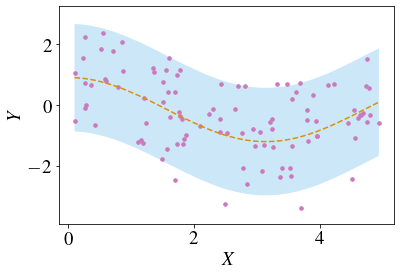

In [11]:
q = np.quantile(np.abs(res_cal),(1-alpha)*(1+1/len(idx_test)))
plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2, s=50)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],'--',color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 y_pred_test[np.argsort(X[idx_test])]+q,
                 y_pred_test[np.argsort(X[idx_test])]-q,
                 fc=color_cal,alpha=.3)
plt.ylim(min(Y_add)-0.3,max(Y_add)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('test_homo.pdf', bbox_inches='tight',dpi=300)
plt.show()

# Heteroskedastic illustrations

### CQR

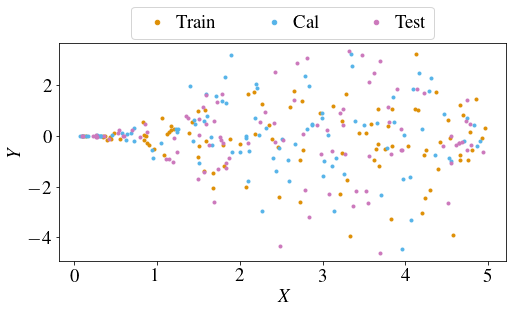

In [12]:
Y_mul = (1-np.cos(X))*eps
plt.figure(figsize=(8,4))
plt.scatter(X[idx_train],Y_mul[idx_train],marker='.',color=color_train,label="Train")
plt.scatter(X[idx_cal],Y_mul[idx_cal],marker='.',color=color_cal,label="Cal")
plt.scatter(X[idx_test],Y_mul[idx_test],marker='.',color=color_test,label="Test")
plt.legend(loc=(0.16, 1.02), ncols=3, handletextpad=0, markerscale=1.5)
plt.ylim(min(Y_mul)-0.3,max(Y_mul)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('all_hetero.pdf', bbox_inches='tight',dpi=300)
plt.show()

In [13]:
Y = Y_mul
X_f = np.cos(X)

In [14]:
data = pd.DataFrame(data = [X_f[idx_train], Y[idx_train]], index = ["x", "y"]).T
mod = smf.quantreg('y ~ x', data)
res_sup = mod.fit(q=1-alpha/2)
res_inf = mod.fit(q=alpha/2)

In [15]:
y_sup_train = res_sup.predict({'x': X_f[idx_train]})
y_sup_cal = res_sup.predict({'x': X_f[idx_cal]})
y_sup_test = res_sup.predict({'x': X_f[idx_test]})
y_inf_train = res_inf.predict({'x': X_f[idx_train]})
y_inf_cal = res_inf.predict({'x': X_f[idx_cal]})
y_inf_test = res_inf.predict({'x': X_f[idx_test]})

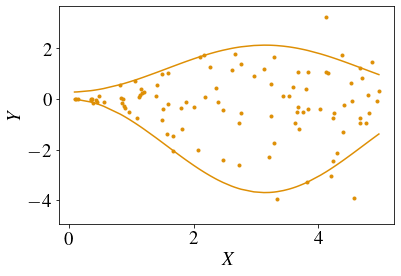

In [16]:
plt.scatter(X[idx_train],Y[idx_train],marker='.',color=color_train)
plt.plot(X[idx_train][np.argsort(X[idx_train])],y_inf_train[np.argsort(X[idx_train])],color=color_train)
plt.plot(X[idx_train][np.argsort(X[idx_train])],y_sup_train[np.argsort(X[idx_train])],color=color_train)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('train_hetero.pdf', bbox_inches='tight',dpi=300)
plt.show()

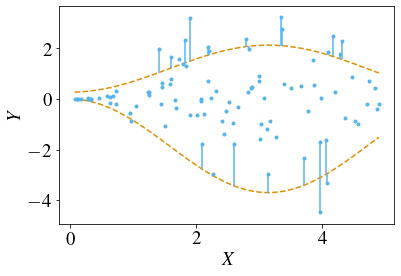

In [17]:
plt.plot(X[idx_cal][np.argsort(X[idx_cal])],y_inf_cal[np.argsort(X[idx_cal])],'--',color=color_train)
plt.plot(X[idx_cal][np.argsort(X[idx_cal])],y_sup_cal[np.argsort(X[idx_cal])],'--',color=color_train)
high = np.where(Y[idx_cal] > 1.6)
low = np.where(Y[idx_cal] < -1.6)
plt.vlines(X[idx_cal][high],Y[idx_cal][high],y_sup_cal.values[high],color=color_cal)
plt.vlines(X[idx_cal][low],Y[idx_cal][low],y_inf_cal.values[low],color=color_cal)
plt.scatter(X[idx_cal],Y[idx_cal],marker='.',color=color_cal,zorder=2)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('cal_hetero.pdf', bbox_inches='tight',dpi=300)
plt.show()

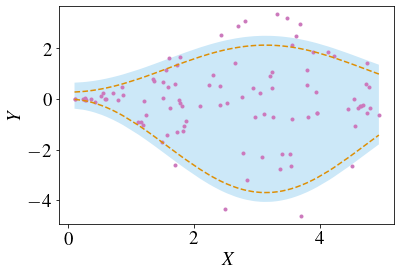

In [18]:
res_cal = np.maximum(Y[idx_cal]-y_sup_cal.values, y_inf_cal.values-Y[idx_cal])
q = np.quantile(res_cal,(1-alpha)*(1+1/len(idx_test)))
plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_inf_test[np.argsort(X[idx_test])],'--',color=color_train)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_sup_test[np.argsort(X[idx_test])],'--',color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 y_sup_test[np.argsort(X[idx_test])]+q,
                 y_inf_test[np.argsort(X[idx_test])]-q,
                 fc=color_cal,alpha=.3)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('comp_CQR.pdf', bbox_inches='tight',dpi=300)
plt.show()

### From no coverage to conditional coverage

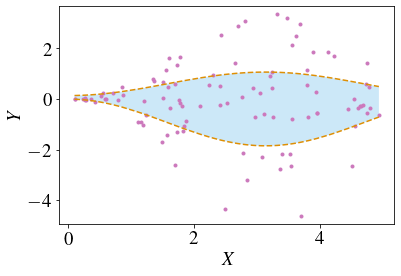

In [19]:
## No marginal coverage

res_cal = np.maximum(Y[idx_cal]-y_sup_cal.values, y_inf_cal.values-Y[idx_cal])
q = np.quantile(res_cal,(1-alpha)*(1+1/len(idx_test)))
plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],0.5*y_inf_test[np.argsort(X[idx_test])],'--',color=color_train)
plt.plot(X[idx_test][np.argsort(X[idx_test])],0.5*y_sup_test[np.argsort(X[idx_test])],'--',color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 0.5*y_sup_test[np.argsort(X[idx_test])],
                 0.5*y_inf_test[np.argsort(X[idx_test])],
                 fc=color_cal,alpha=.3)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('comp_nocov_ada.pdf', bbox_inches='tight',dpi=300)
plt.show()

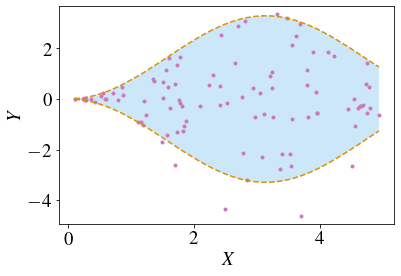

In [20]:
## Perfect conditional coverage

perfect_quantile_inf = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(alpha/2)
perfect_quantile_sup = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(1-alpha/2)

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],perfect_quantile_inf,'--',color=color_train)
plt.plot(X[idx_test][np.argsort(X[idx_test])],perfect_quantile_sup,'--',color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 perfect_quantile_inf,
                 perfect_quantile_sup,
                 fc=color_cal,alpha=.3)

plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('comp_Cond_ada.pdf', bbox_inches='tight',dpi=300)
plt.show()

### Comparing conformity scores functions

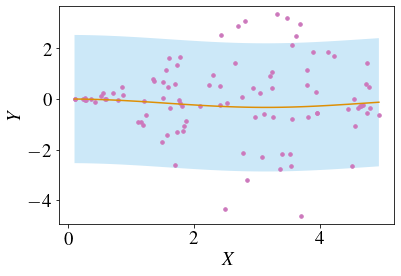

In [21]:
## Mean-based SCP with absolute values residuals as scores

reg = LinearRegression()
reg.fit(X_f[idx_train].reshape(-1, 1), Y[idx_train])
y_pred_cal = reg.predict(X_f[idx_cal].reshape(-1, 1))
y_pred_train = reg.predict(X_f[idx_train].reshape(-1, 1))
res_cal = Y[idx_cal]-y_pred_cal
y_pred_test = reg.predict(X_f[idx_test].reshape(-1, 1))

q = np.quantile(np.abs(res_cal),(1-alpha)*(1+1/len(idx_test)))
plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2, s=50)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 y_pred_test[np.argsort(X[idx_test])]+q,
                 y_pred_test[np.argsort(X[idx_test])]-q,
                 fc=color_cal,alpha=.3)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('comp_SCP_ada.pdf', bbox_inches='tight',dpi=300)
plt.show()

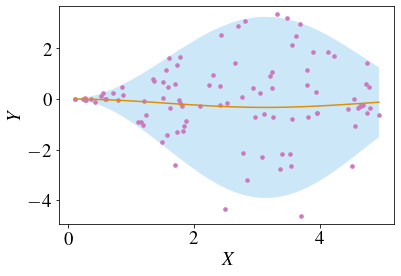

In [22]:
## Mean-based SCP with localized scores

residuals_train = np.abs(y_pred_train-Y[idx_train])
data = pd.DataFrame(data = [X_f[idx_train], residuals_train], index = ["x", "y"]).T
quantile_reg = smf.quantreg('y ~ x', data)
my_quantile_reg = quantile_reg.fit(q=0.5)

new_res_cal = np.abs(Y[idx_cal]-y_pred_cal)/my_quantile_reg.predict({'x': X_f[idx_cal]})
q_new = np.quantile(np.abs(new_res_cal),(1-alpha)*(1+1/len(idx_cal)))

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2, s=50)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 y_pred_test[np.argsort(X[idx_test])]+q_new*my_quantile_reg.predict({'x': X_f[idx_test][np.argsort(X[idx_test])]}),
                 y_pred_test[np.argsort(X[idx_test])]-q_new*my_quantile_reg.predict({'x': X_f[idx_test][np.argsort(X[idx_test])]}),
                 fc=color_cal,alpha=.3)
plt.ylim(min(Y)-0.3,max(Y)+0.3)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.savefig('comp_WeightedSCP_ada.pdf', bbox_inches='tight',dpi=300)
plt.show()

# Quantile regression illustrations

In [26]:
def pinball_loss(beta, x):
    return beta*x*(x>=0)+(1-beta)*np.abs(x)*(x<0)

In [27]:
colors = [colors_blindness[4],colors_blindness[6],colors_blindness[8],
          colors_blindness[1],colors_blindness[9],colors_blindness[0],colors_blindness[2]]

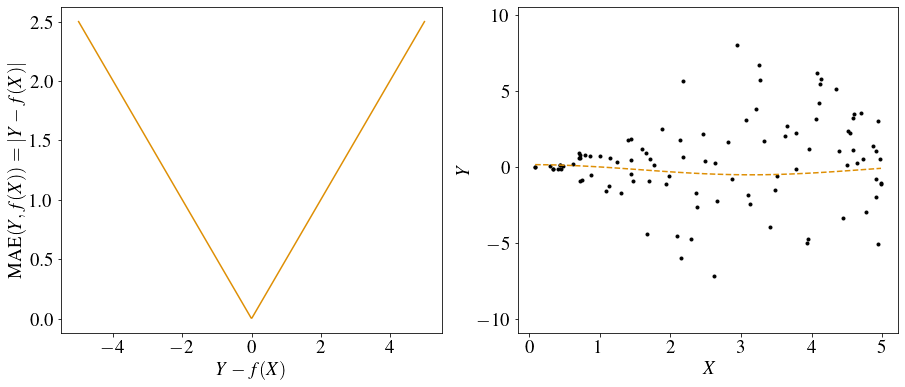

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

beta = 0.5

data = pd.DataFrame(data = [X_f[idx_train], Y[idx_train]], index = ["x", "y"]).T
mod = smf.quantreg('y ~ x', data)
res_beta = mod.fit(q=beta)
y_beta_train = res_beta.predict({'x': X_f[idx_train]})
y_beta_cal = res_beta.predict({'x': X_f[idx_cal]})

u = np.linspace(-5,5, num=500)
l_u = pinball_loss(beta, u)

ax1.plot(u, l_u, color=color_train)
ax1.set_xlabel(r'$Y-f(X)$')
ax1.set_ylabel(r'MAE$(Y,f(X)) = |Y-f(X)|$')

ax2.scatter(X[idx_cal],Y[idx_cal],marker='.',color='black')
ax2.plot(X[idx_cal][np.argsort(X[idx_cal])],y_beta_cal[np.argsort(X[idx_cal])],'--',color=color_train)
ax2.set_ylim(min(Y)-0.3,max(Y)+0.3)
ax2.set_xlabel(r'$X$')
ax2.set_ylabel(r'$Y$')

#plt.savefig('median_reg.pdf', bbox_inches='tight',dpi=300)

plt.show()

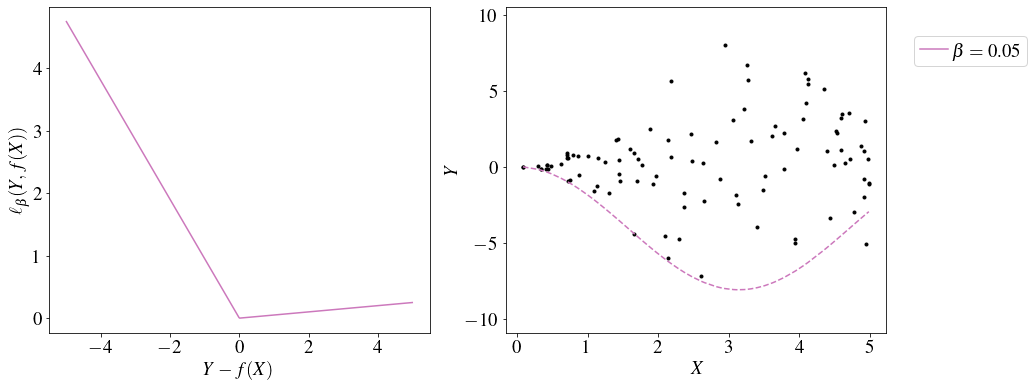

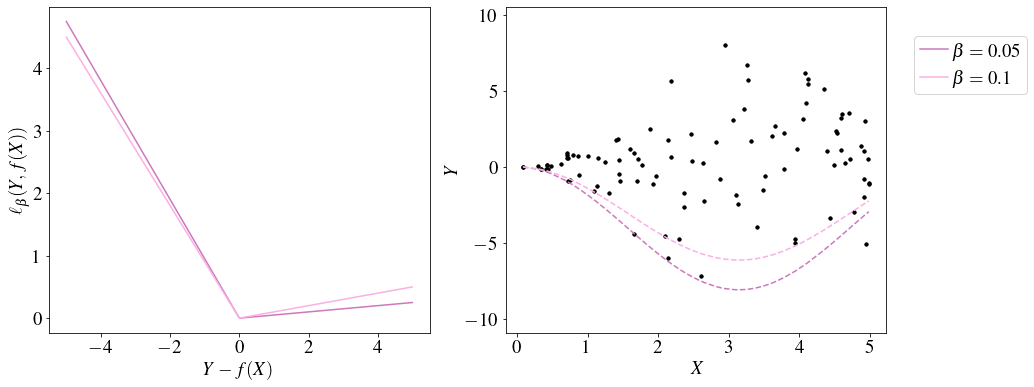

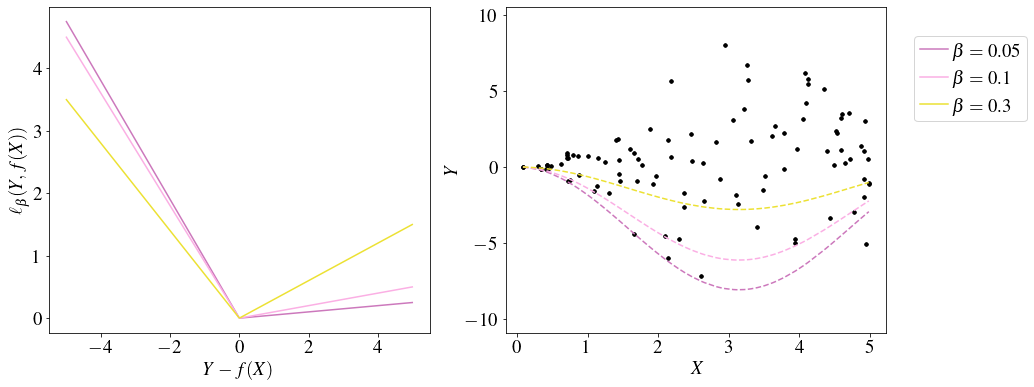

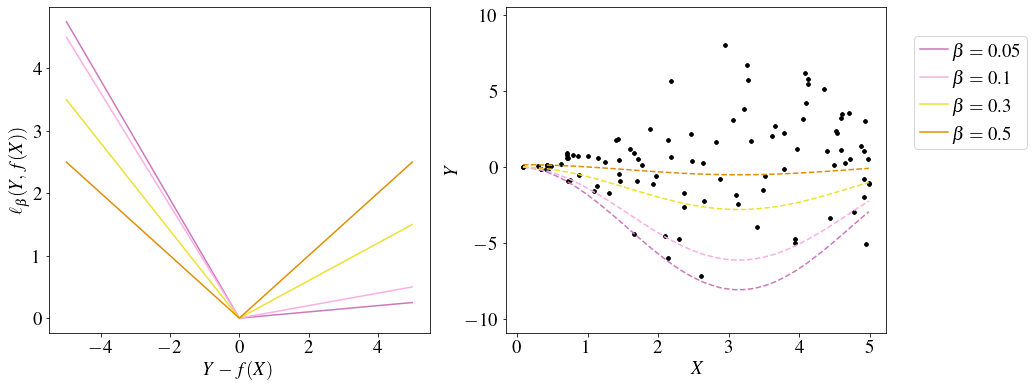

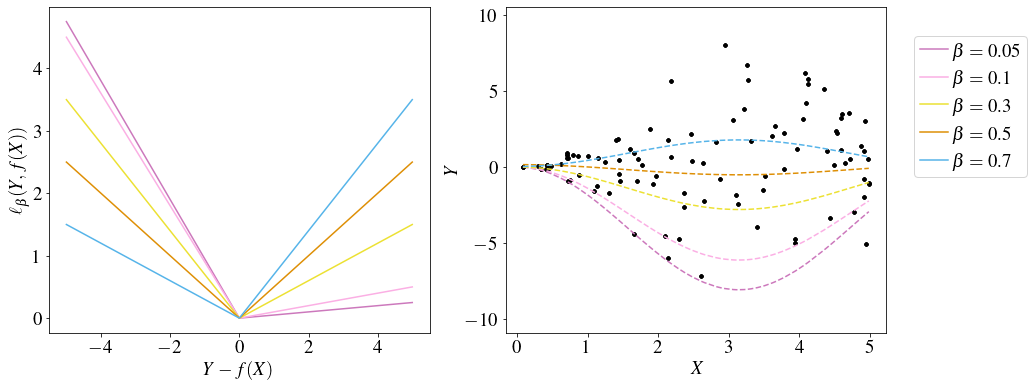

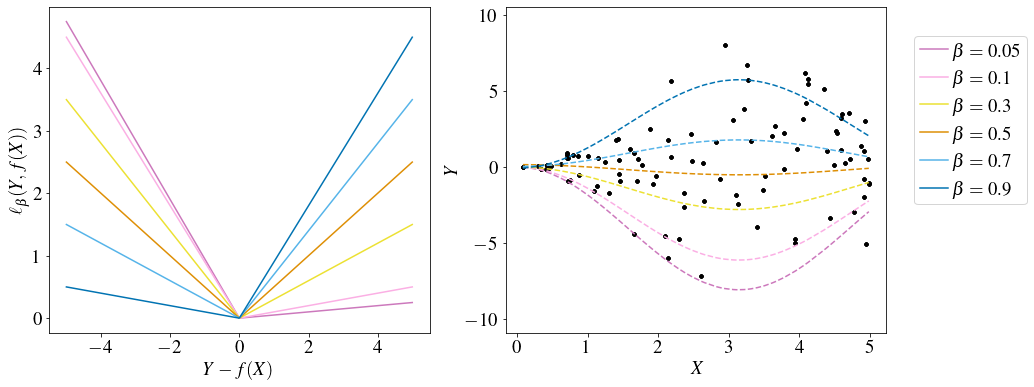

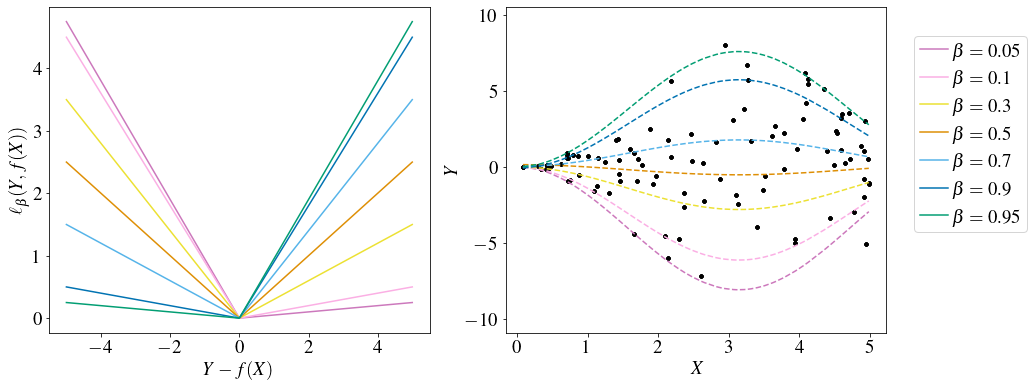

In [29]:
betas = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95]
for idp in range(len(betas)):
    
    beta = betas[idp]
    beta_temp = betas[:(idp+1)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    handles = []
    labels = []
    
    for idc,beta in enumerate(beta_temp):
    
        data = pd.DataFrame(data = [X_f[idx_train], Y[idx_train]], index = ["x", "y"]).T
        mod = smf.quantreg('y ~ x', data)
        res_beta = mod.fit(q=beta)
        y_beta_train = res_beta.predict({'x': X_f[idx_train]})
        y_beta_cal = res_beta.predict({'x': X_f[idx_cal]})

        u = np.linspace(-5,5, num=500)
        l_u = pinball_loss(beta, u)

        ax1.plot(u, l_u, color=colors[idc])
        ax1.set_xlabel(r'$Y-f(X)$')
        ax1.set_ylabel(r'$\ell_\beta(Y,f(X)) $')

        ax2.scatter(X[idx_cal],Y[idx_cal],marker='.',color='black')
        ax2.plot(X[idx_cal][np.argsort(X[idx_cal])],y_beta_cal[np.argsort(X[idx_cal])],'--',color=colors[idc])
        ax2.set_ylim(min(Y)-0.3,max(Y)+0.3)
        ax2.set_xlabel(r'$X$')
        ax2.set_ylabel(r'$Y$')
        
        label = r'$\beta=$ '+str(beta)
        handles.append(mlines.Line2D([], [], color=colors[idc], linestyle='-'))
        labels.append(label)

    fig.legend(handles, labels, bbox_to_anchor= (1.05, 0.86),handletextpad=0.2, 
               labelspacing=0.5, borderpad=0.3, handlelength=1.5, borderaxespad=1.1)
    
    #plt.savefig('qreg_all_'+str(beta)+'.pdf', bbox_inches='tight',dpi=300)
    
    plt.show()

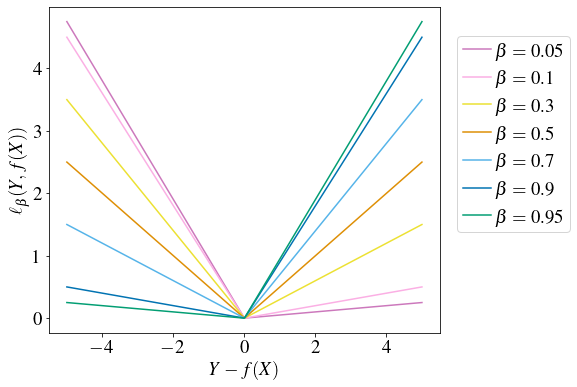

In [30]:
betas = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

fig, (ax1) = plt.subplots(1, 1, figsize=(7,6))

handles = []
labels = []

for idc,beta in enumerate(betas):

    u = np.linspace(-5,5, num=500)
    l_u = pinball_loss(beta, u)

    ax1.plot(u, l_u, color=colors[idc])
    ax1.set_xlabel(r'$Y-f(X)$')
    ax1.set_ylabel(r'$\ell_\beta(Y,f(X)) $')

    label = r'$\beta=$ '+str(beta)
    handles.append(mlines.Line2D([], [], color=colors[idc], linestyle='-'))
    labels.append(label)

fig.legend(handles, labels, bbox_to_anchor= (1.2, 0.86),handletextpad=0.2, 
           labelspacing=0.5, borderpad=0.3, handlelength=1.5, borderaxespad=1.1)

#plt.savefig('pinball_losses.pdf', bbox_inches='tight',dpi=300)

plt.show()

# Motivating illustrations

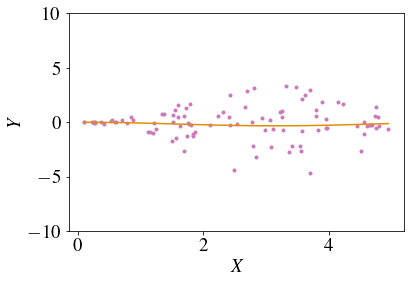

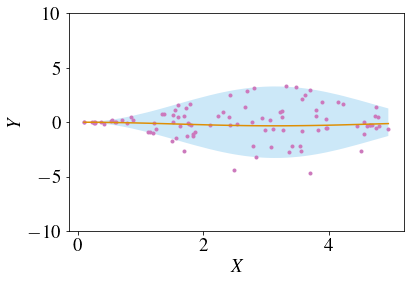

In [23]:
sigma = 1

perfect_quantile_inf = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(alpha/2, scale=sigma)
perfect_quantile_sup = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(1-alpha/2, scale=sigma)

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 perfect_quantile_inf,
                 perfect_quantile_sup,
                 fc=color_cal,alpha=.3)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_UQ_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()

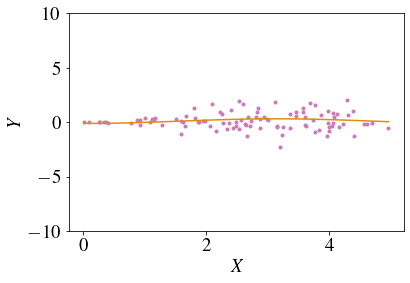

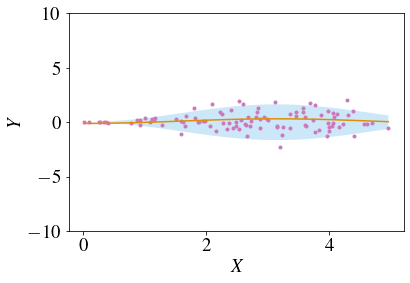

In [24]:
sigma = 0.5

X = np.random.uniform(low=0,high=5,size=n)
eps = np.random.normal(scale=sigma, size=n)

Y_mul = (1-np.cos(X))*eps

Y = Y_mul
X_f = np.cos(X)

idx = np.random.permutation(n)
n_half = int(np.floor(n/3))
idx_train, idx_cal, idx_test = idx[:n_half], idx[n_half:2*n_half], idx[2*n_half:]

reg = LinearRegression()
reg.fit(X_f[idx_train].reshape(-1, 1), Y[idx_train])
y_pred_cal = reg.predict(X_f[idx_cal].reshape(-1, 1))
y_pred_train = reg.predict(X_f[idx_train].reshape(-1, 1))
res_cal = Y[idx_cal]-y_pred_cal
y_pred_test = reg.predict(X_f[idx_test].reshape(-1, 1))

perfect_quantile_inf = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(alpha/2, scale=sigma)
perfect_quantile_sup = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(1-alpha/2, scale=sigma)

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 perfect_quantile_inf,
                 perfect_quantile_sup,
                 fc=color_cal,alpha=.3)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_UQ_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()

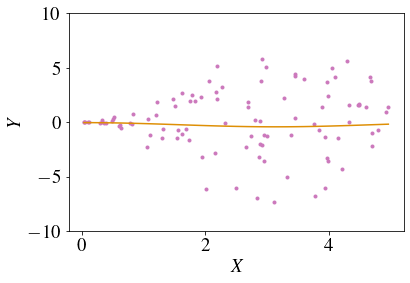

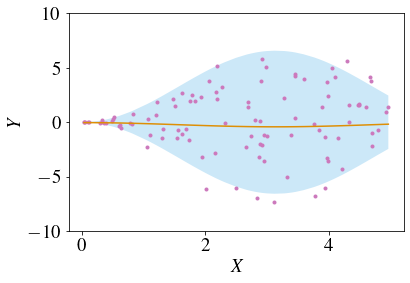

In [25]:
sigma = 2

X = np.random.uniform(low=0,high=5,size=n)
eps = np.random.normal(scale=sigma, size=n)

Y_mul = (1-np.cos(X))*eps

Y = Y_mul
X_f = np.cos(X)

idx = np.random.permutation(n)
n_half = int(np.floor(n/3))
idx_train, idx_cal, idx_test = idx[:n_half], idx[n_half:2*n_half], idx[2*n_half:]

reg = LinearRegression()
reg.fit(X_f[idx_train].reshape(-1, 1), Y[idx_train])
y_pred_cal = reg.predict(X_f[idx_cal].reshape(-1, 1))
y_pred_train = reg.predict(X_f[idx_train].reshape(-1, 1))
res_cal = Y[idx_cal]-y_pred_cal
y_pred_test = reg.predict(X_f[idx_test].reshape(-1, 1))

perfect_quantile_inf = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(alpha/2, scale=sigma)
perfect_quantile_sup = (1-np.cos(X[idx_test][np.argsort(X[idx_test])]))*norm.ppf(1-alpha/2, scale=sigma)

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()

plt.scatter(X[idx_test],Y[idx_test],marker='.',color=color_test,zorder=2)
plt.plot(X[idx_test][np.argsort(X[idx_test])],y_pred_test[np.argsort(X[idx_test])],color=color_train)
plt.fill_between(X[idx_test][np.argsort(X[idx_test])],
                 perfect_quantile_inf,
                 perfect_quantile_sup,
                 fc=color_cal,alpha=.3)
plt.ylim(-10,10)

plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

#plt.savefig('comp_pred_UQ_sigma_'+str(sigma)+'.pdf', bbox_inches='tight',dpi=300)
plt.show()